In [1]:
# Libraries

import numpy
import os
import shutil
import warnings

In [2]:
# Code

from src.data.analysis import gene_annotation as data_annotation
from src.data.analysis import gene_assembly   as data_assembly
from src.data.analysis import tissue_metadata as data_metadata
from src.data.analysis import tissue_tpm      as data_tpm
from src.data.feature  import annodata        as data_anndata
from src.data.feature  import tsne            as data_tsne
from src.io            import loader          as data_loader
from src.io            import writer          as data_writer

# 1. Setup

In [3]:
# Setup some directory paths

OUT_SUBFOLDER = 'nbp02-anndata'
RES_SUBFOLDER = ''

CWD = os.getcwd()
OUT = os.path.join(CWD, 'out')
RES = os.path.join(CWD, 'res')

OUT_DATA  = os.path.join(OUT, 'data',  OUT_SUBFOLDER)
OUT_PLOT  = os.path.join(OUT, 'plot',  OUT_SUBFOLDER)
RES_NBP01 = os.path.join(OUT, 'data',  'nbp01-analysis')

shutil.rmtree(OUT_DATA, ignore_errors = True)
shutil.rmtree(OUT_PLOT, ignore_errors = True)

os.makedirs(OUT_DATA, exist_ok = True)
os.makedirs(OUT_PLOT, exist_ok = True)

print(f'     Root Directory : {CWD}')
print(f'   Output Directory : {OUT}')
print(f' Resource Directory : {RES}')

     Root Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\out
 Resource Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\res


In [4]:
# Load the updated and synchronized data

tissue_metadata = data_loader.load_csv(
	filename = os.path.join(RES_NBP01, 'tissue-metadata.csv')
)

tissue_tpm = data_loader.load_csv(
	filename = os.path.join(RES_NBP01, 'tissue-tpm.csv')
)

# 2. Anndata

In [5]:
# Create anndata object from the metadata and tpm tables

with warnings.catch_warnings() :
	warnings.simplefilter('ignore')

	anndata = data_anndata.create_anndata(
		mat    = tissue_tpm,
		obs    = tissue_metadata,
		mat_id = 'Sample',
		obs_id = 'Sample'
	)

data_anndata.show_structure(anndata)

AnnData object with n_obs × n_vars = 4138 × 34517
    obs: 'Sample', 'Study', 'Control', 'Senescence', 'Age', 'Tissue', 'Group', 'Perturbation', 'Counts'


In [6]:
# Display anndata tpm matrix information

data_anndata.show_matrix(anndata, layer = None)

   Max value : 646,459.5
  Mean value :      29.0 ± 420.76878
Median value :       3.6
   Min value :       0.0

Total elements          : 142,831,346
Total elements =    0.0 :  18,077,905 [ 12.66 %]
Total elements >    0.0 : 124,753,441 [ 87.34 %]
Total elements >    1.0 :  98,579,314 [ 69.02 %]
Total elements >   10.0 :  46,024,522 [ 32.22 %]
Total elements >   50.0 :  12,848,671 [  9.00 %]
Total elements >  100.0 :   6,333,919 [  4.43 %]
Total elements >  250.0 :   2,296,899 [  1.61 %]

[[ 18.08   2.16  11.26   0.00   0.82   0.87   8.01   0.00  116.70   3.99]
 [ 19.88   0.00   8.45   3.64   1.35   1.55   9.04   1.11  122.78   1.42]
 [ 31.11   0.51  10.62   0.00   0.49   0.68  11.95   1.08  137.15  11.39]
 [ 25.55   1.47  12.42   3.29   0.00   0.66   9.98   0.23  141.10   7.60]
 [ 30.07   2.09   9.27   0.63   0.88   1.54   4.81   7.09  159.38   0.00]]


# 3. Log

In [7]:
# Compute and save the log1p tpm values

anndata = data_anndata.compute_log1p(
	data       = anndata,
	layer      = None,
	base       = 2,
	store_into = 'log1p'
)

In [8]:
# Display anndata log1p tpm matrix information

data_anndata.show_matrix(anndata, layer = 'log1p')

   Max value :  19.30220
  Mean value :   2.54852 ± 2.16671
Median value :   2.21551
   Min value :   0.00000

Total elements        : 142,831,346
Total elements =  0.0 :  18,077,905 [ 12.66 %]
Total elements >  0.0 : 124,753,441 [ 87.34 %]
Total elements >  1.0 :  98,579,314 [ 69.02 %]
Total elements >  3.0 :  55,166,967 [ 38.62 %]
Total elements >  5.0 :  20,124,921 [ 14.09 %]
Total elements >  7.0 :   4,911,332 [  3.44 %]
Total elements >  9.0 :     947,263 [  0.66 %]

[[  4.25   1.66   3.62   0.00   0.86   0.90   3.17   0.00   6.88   2.32]
 [  4.38   0.00   3.24   2.21   1.23   1.35   3.33   1.08   6.95   1.27]
 [  5.01   0.59   3.54   0.00   0.57   0.75   3.69   1.05   7.11   3.63]
 [  4.73   1.30   3.75   2.10   0.00   0.73   3.46   0.30   7.15   3.10]
 [  4.96   1.63   3.36   0.70   0.91   1.35   2.54   3.02   7.33   0.00]]


Function : numpy.mean
Genes below 10th percentile [   0.493916] :  3,452
Genes below 30th percentile [   1.261117] : 10,355
Genes above 70th percentile [   3.401025] : 10,355
Genes above 90th percentile [   5.059898] :  3,452

Function : numpy.amax
Genes below 10th percentile [   4.106795] :  3,452
Genes below 30th percentile [   5.394631] : 10,355
Genes above 70th percentile [   7.639292] : 10,355
Genes above 90th percentile [   9.741867] :  3,452

Function : numpy.std
Genes below 10th percentile [   0.594344] :  3,452
Genes below 30th percentile [   0.797624] : 10,355
Genes above 70th percentile [   1.185729] : 10,355
Genes above 90th percentile [   1.688650] :  3,452



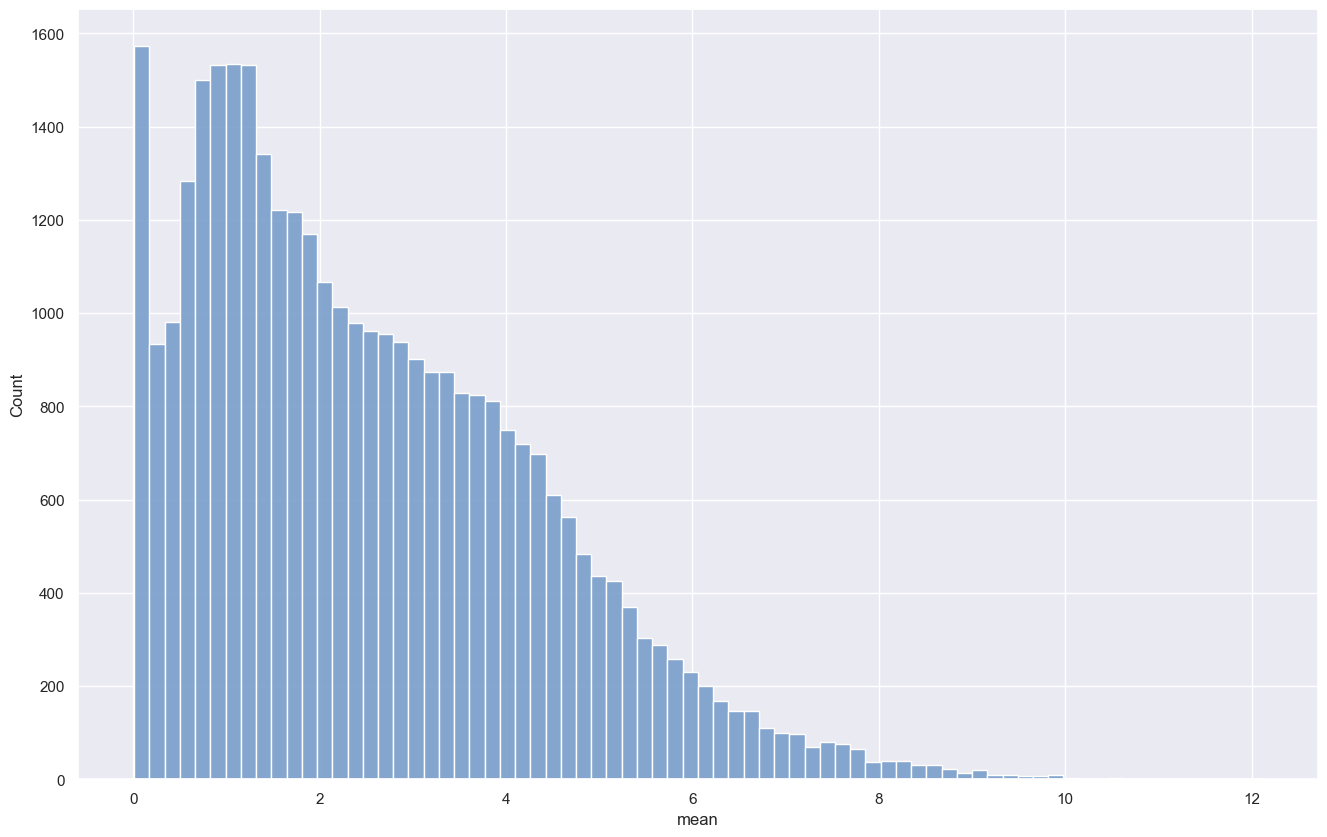

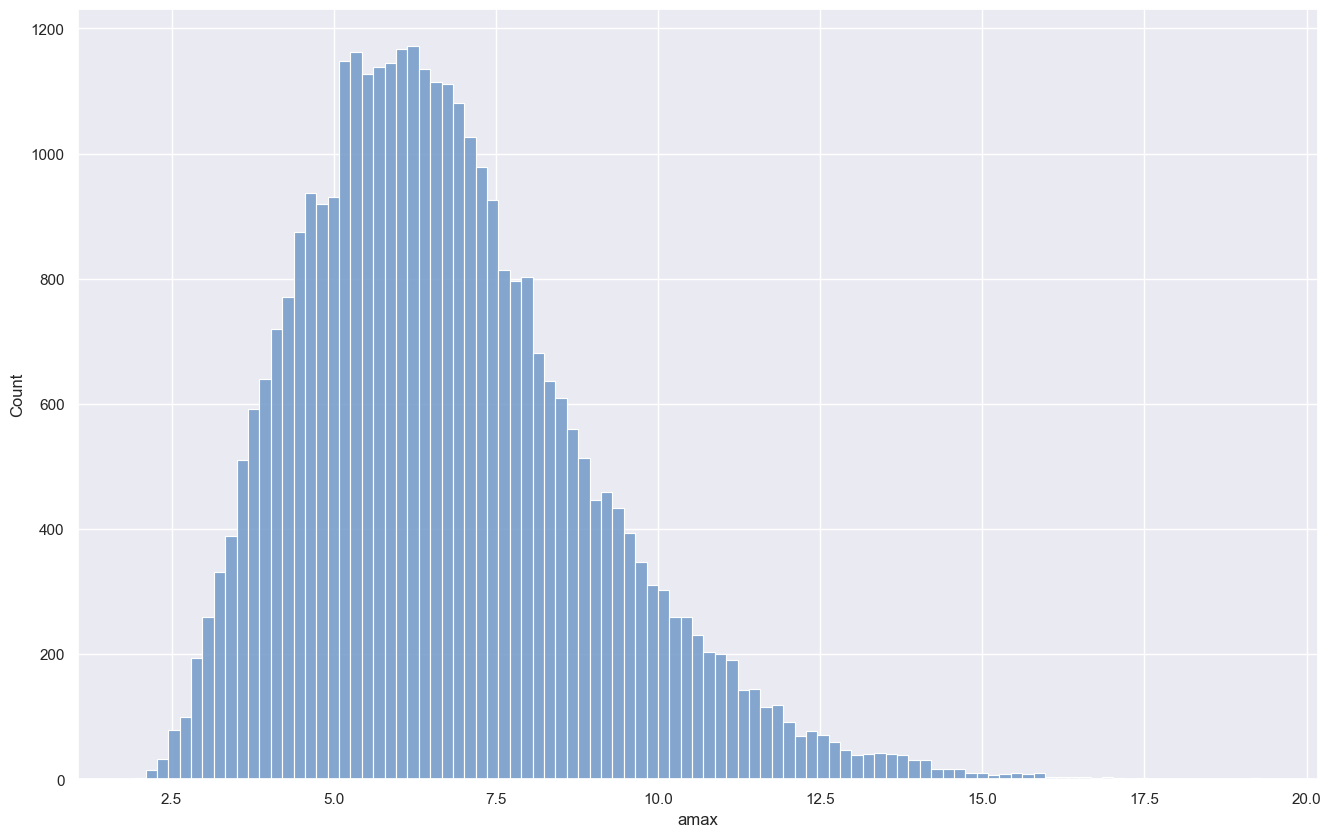

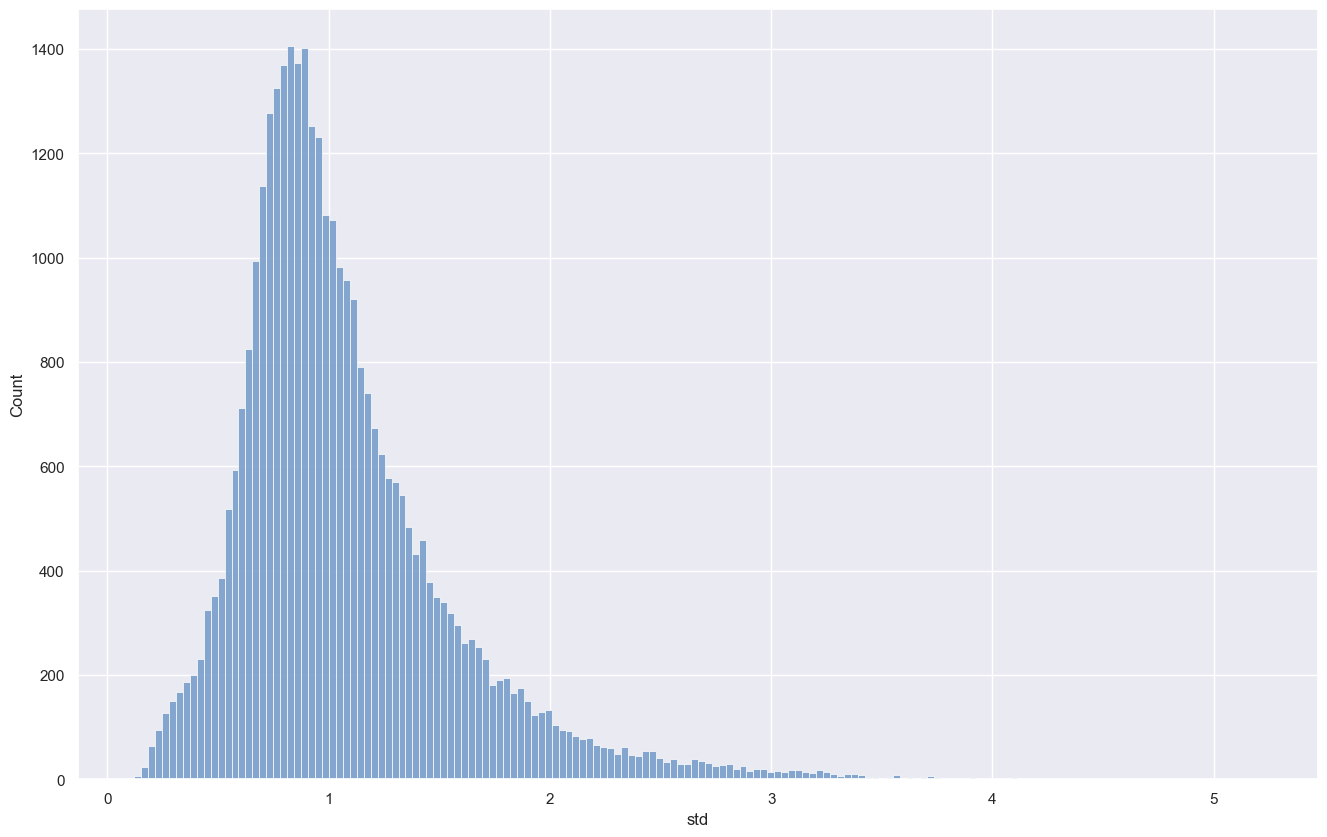

In [9]:
# Display log1p tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'log1p',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-log1p-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'log1p',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-log1p-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'log1p',
	function = numpy.std,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-log1p-std')
)

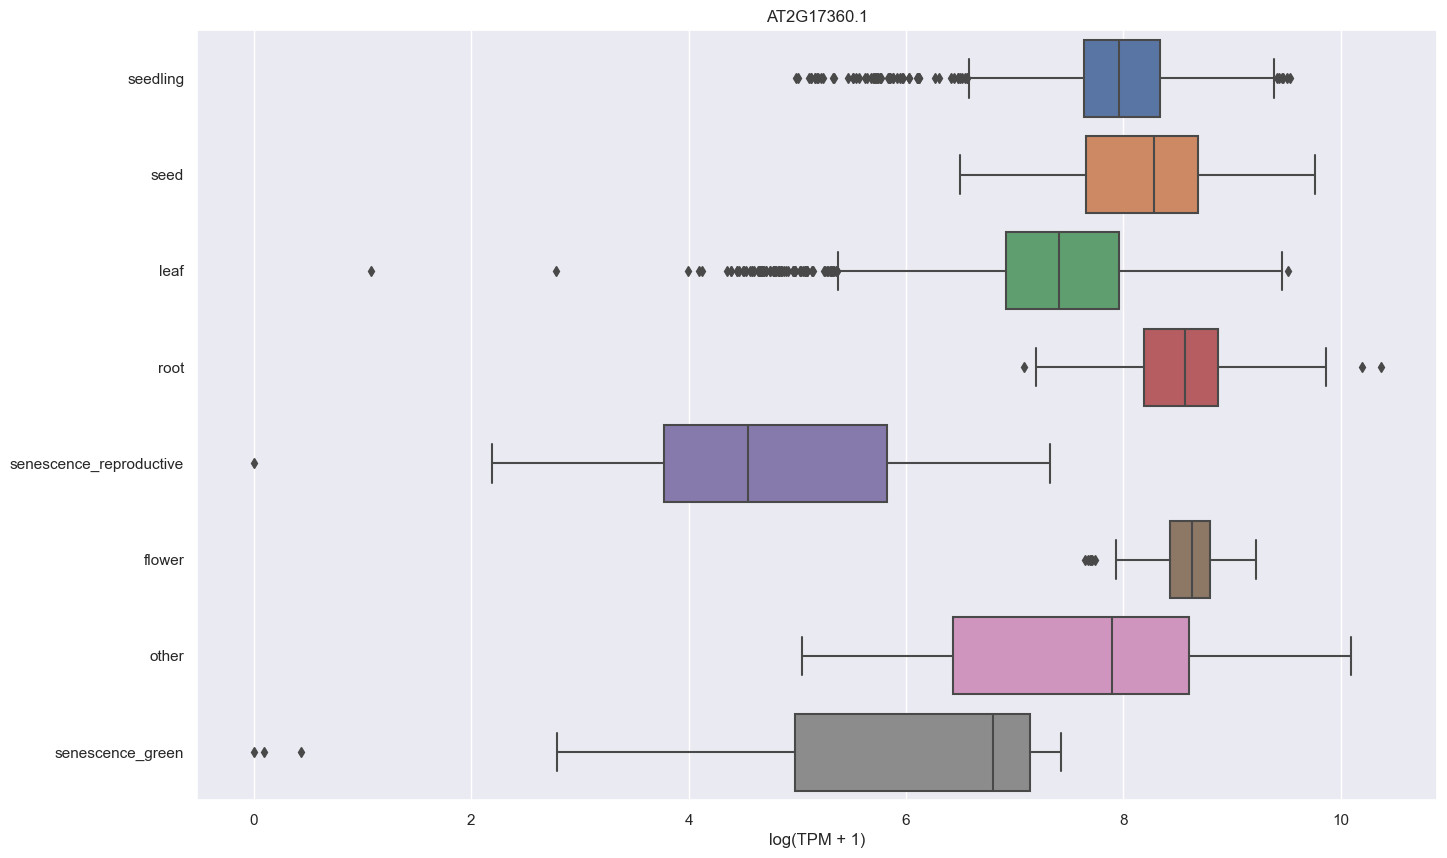

In [10]:
# Display an example of a high-expressive gene <AT2G17360.1>

data_anndata.gene_boxplot(
	data     = anndata,
	gene     = 'AT2G17360.1',
	groupby  = 'Tissue',
	layer    = 'log1p',
	filename = os.path.join(OUT_PLOT, 'tissue-AT2G17360.1')
)

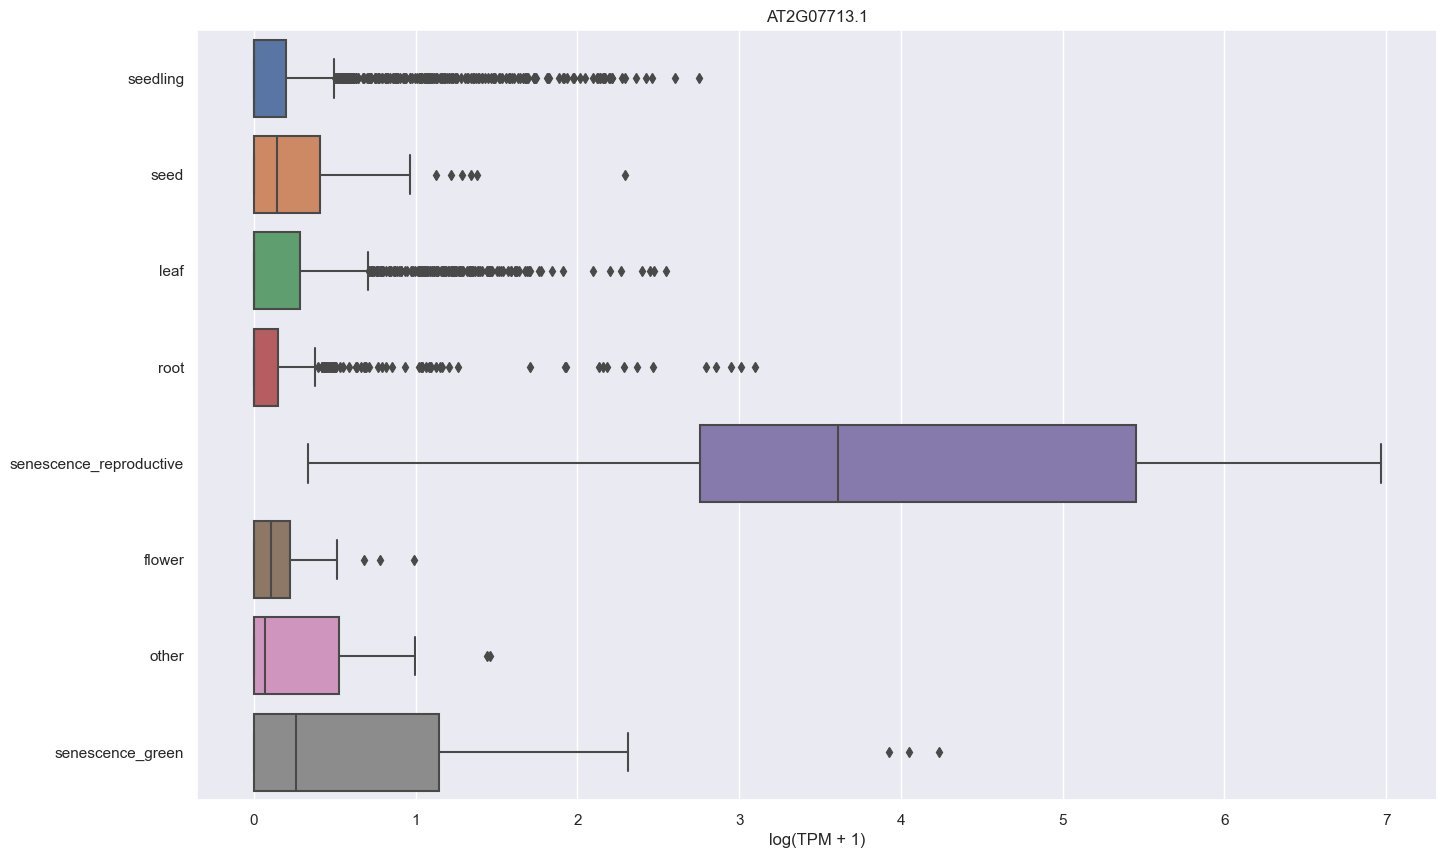

In [11]:
# Display an example of a tissue-specific expressive gene <AT2G07713.1>

data_anndata.gene_boxplot(
	data     = anndata,
	gene     = 'AT2G07713.1',
	groupby  = 'Tissue',
	layer    = 'log1p',
	filename = os.path.join(OUT_PLOT, 'tissue-AT2G07713.1')
)

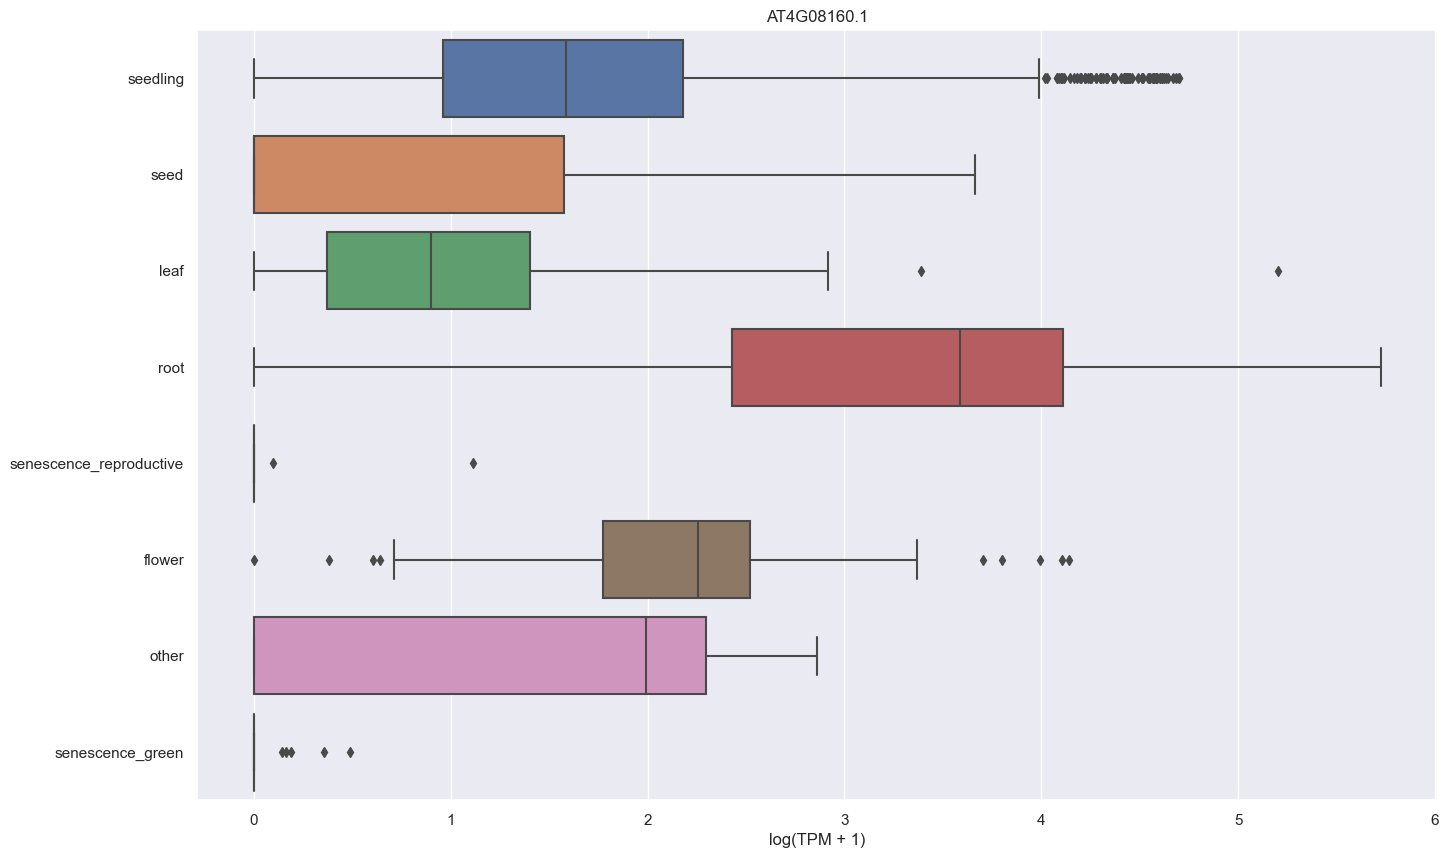

In [12]:
# Display an example of a tissue-prevelant expressive gene <AT4G08160.1>

data_anndata.gene_boxplot(
	data     = anndata,
	gene     = 'AT4G08160.1',
	groupby  = 'Tissue',
	layer    = 'log1p',
	filename = os.path.join(OUT_PLOT, 'tissue-AT4G08160.1')
)

# 4. BoxCox

In [13]:
# Compute and save the boxcox1p tpm values

anndata = data_anndata.compute_boxcox1p(
	data       = anndata,
	store_into = 'boxcox1p',
	layer      = 'log1p'
)

BoxCox eps    : 1e-7
BoxCox lambda : 0.27680


In [14]:
# Display anndata boxcox1p tpm matrix information

data_anndata.show_matrix(anndata, layer = 'boxcox1p')

   Max value :   4.70040
  Mean value :   1.31501 ± 0.89326
Median value :   1.37890
   Min value :   0.00000

Total elements        : 142,831,346
Total elements =  0.0 :  18,077,905 [ 12.66 %]
Total elements >  0.0 : 124,753,441 [ 87.34 %]
Total elements >  1.0 :  88,951,355 [ 62.28 %]
Total elements >  2.0 :  37,407,931 [ 26.19 %]
Total elements >  3.0 :   2,469,551 [  1.73 %]
Total elements >  4.0 :       8,526 [  0.01 %]

[[  2.11   1.12   1.90   0.00   0.68   0.70   1.75   0.00   2.78   1.42]
 [  2.14   0.00   1.78   1.38   0.90   0.96   1.81   0.81   2.80   0.92]
 [  2.32   0.49   1.88   0.00   0.48   0.61   1.93   0.80   2.84   1.91]
 [  2.24   0.94   1.95   1.33   0.00   0.59   1.85   0.27   2.84   1.73]
 [  2.31   1.11   1.82   0.57   0.71   0.96   1.51   1.70   2.88   0.00]]


Function : numpy.mean
Genes below 10th percentile [   0.353938] :  3,452
Genes below 30th percentile [   0.822511] : 10,355
Genes above 70th percentile [   1.774600] : 10,355
Genes above 90th percentile [   2.302131] :  3,452

Function : numpy.amax
Genes below 10th percentile [   2.060769] :  3,452
Genes below 30th percentile [   2.425162] : 10,355
Genes above 70th percentile [   2.949523] : 10,355
Genes above 90th percentile [   3.357367] :  3,452

Function : numpy.std
Genes below 10th percentile [   0.265162] :  3,452
Genes below 30th percentile [   0.352113] : 10,355
Genes above 70th percentile [   0.535352] : 10,355
Genes above 90th percentile [   0.721364] :  3,452



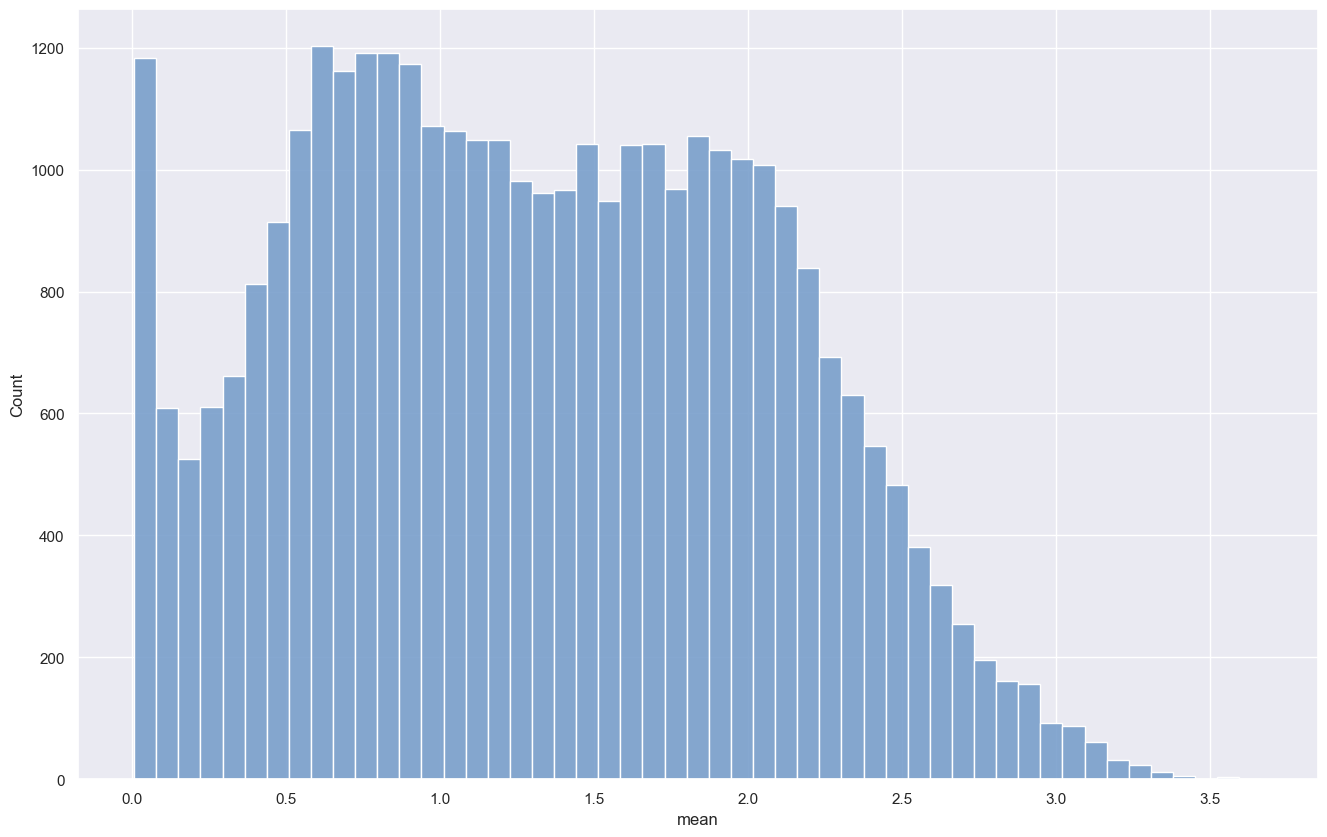

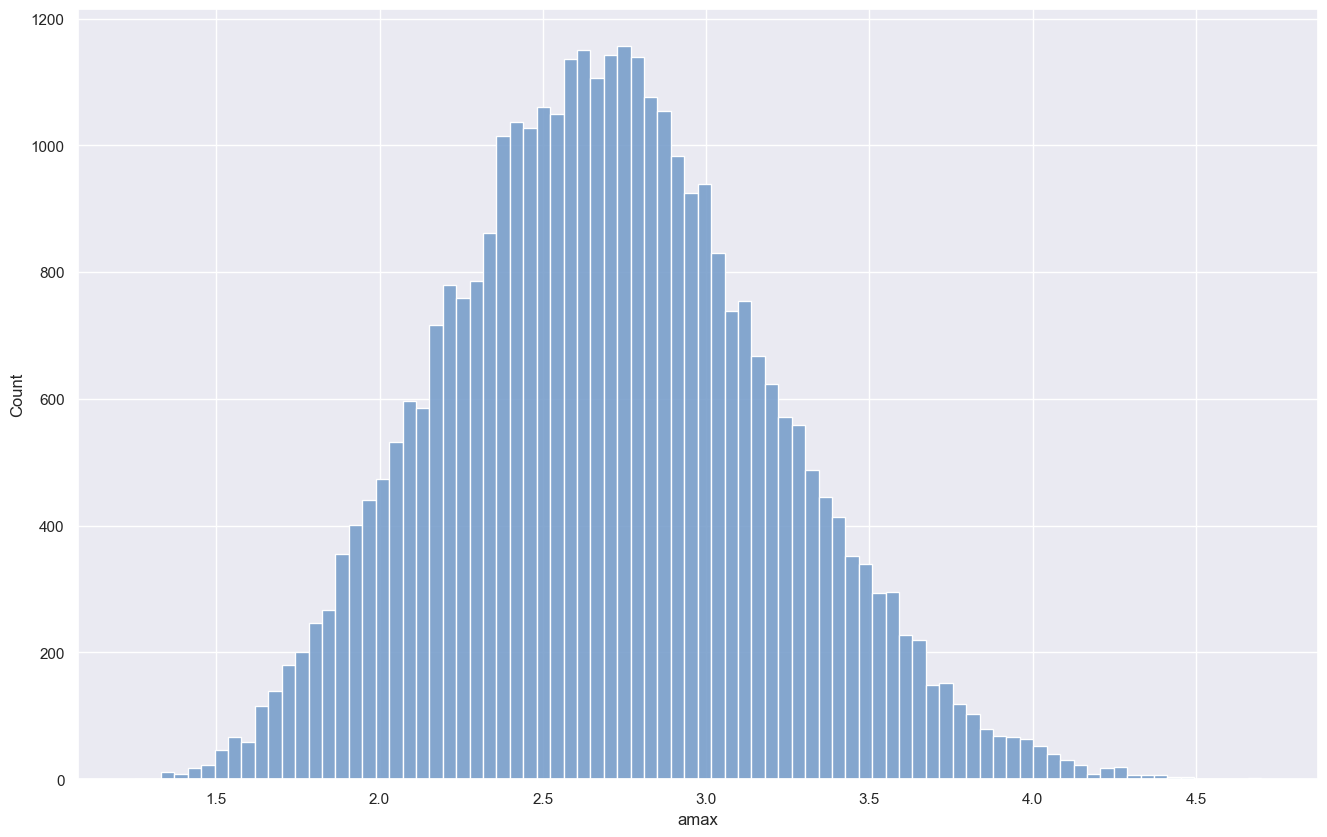

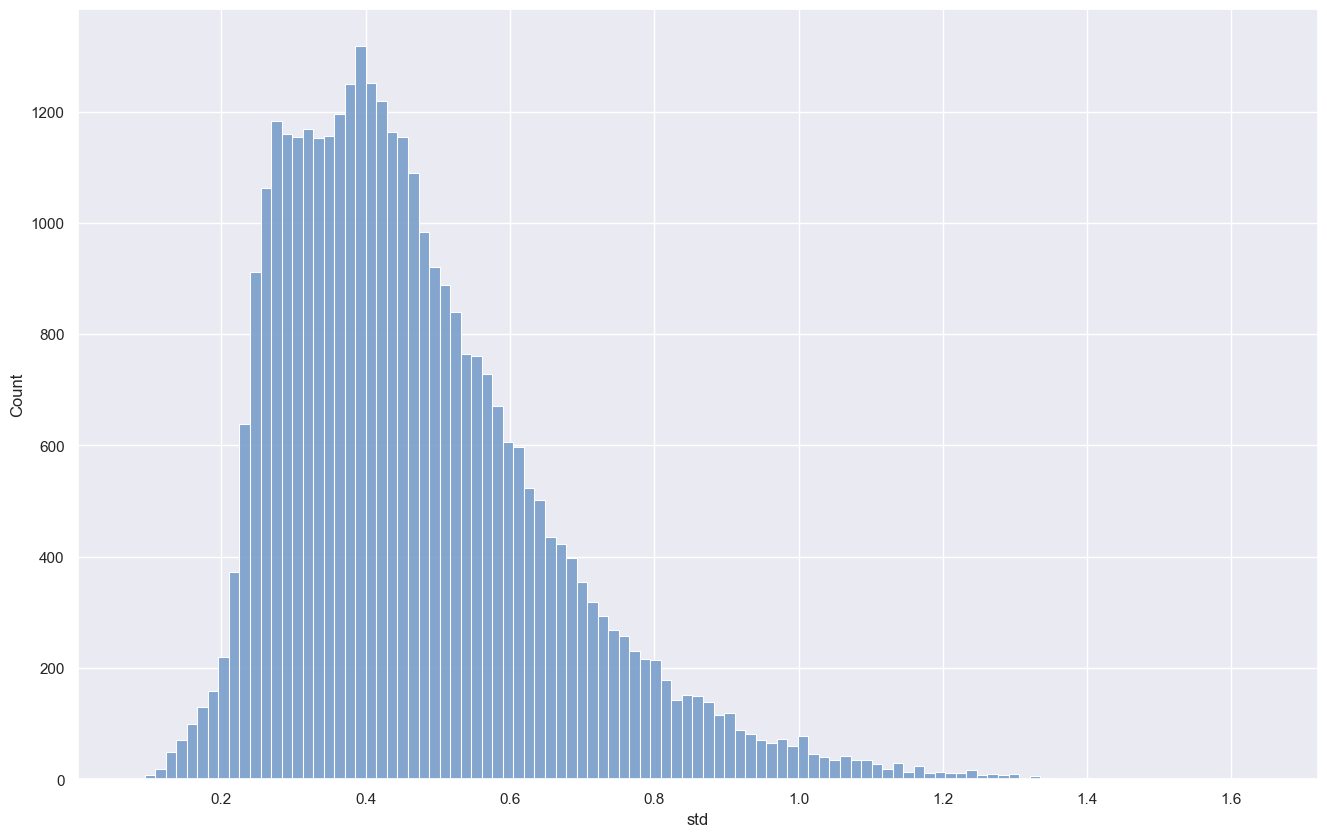

In [15]:
# Display boxcox1p tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'boxcox1p',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-boxcox1p-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'boxcox1p',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-boxcox1p-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'boxcox1p',
	function = numpy.std,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-boxcox1p-std')
)

# 5. Standard

In [16]:
# Compute and save the standardized tpm values

anndata = data_anndata.compute_standardized(
	data       = anndata,
	layer      = 'boxcox1p',
	store_into = 'standard',
	axis       = 0
)

In [17]:
# Display anndata standardized tpm matrix information

data_anndata.show_matrix(anndata, layer = 'standard')

   Max value :  28.13747
  Mean value :  -0.00000 ± 1.00000
Median value :   0.04045
   Min value : -16.90150

Total elements        : 142,831,346
Total elements < -5.0 :     127,635 [  0.09 %]
Total elements < -2.0 :   3,898,291 [  2.73 %]
Total elements < -1.0 :  19,173,610 [ 13.42 %]
Total elements < -0.5 :  39,899,342 [ 27.93 %]
Total elements < -0.3 :  49,875,423 [ 34.92 %]
Total elements < -0.0 :  69,190,902 [ 48.44 %]
Total elements =  0.0 :           0 [  0.00 %]
Total elements >  0.0 :  73,640,444 [ 51.56 %]
Total elements >  0.3 :  56,295,610 [ 39.41 %]
Total elements >  0.5 :  44,171,198 [ 30.93 %]
Total elements >  1.0 :  18,462,532 [ 12.93 %]
Total elements >  2.0 :   2,060,821 [  1.44 %]
Total elements >  5.0 :     113,920 [  0.08 %]

[[  0.96   0.09   1.05  -1.52  -0.31  -0.76   0.49  -2.42   0.47   0.85]
 [  1.04  -1.51   0.85   0.99   0.23  -0.19   0.64  -0.82   0.53   0.23]
 [  1.40  -0.80   1.01  -1.52  -0.81  -0.98   0.97  -0.85   0.66   1.45]
 [  1.24  -0.17   1.12

Function : numpy.mean
Genes below 10th percentile [  -0.000000] :  3,452
Genes below 30th percentile [  -0.000000] : 10,355
Genes above 70th percentile [   0.000000] : 10,355
Genes above 90th percentile [   0.000000] :  3,452

Function : numpy.amax
Genes below 10th percentile [   1.810559] :  3,452
Genes below 30th percentile [   2.237834] : 10,355
Genes above 70th percentile [   3.221982] : 10,355
Genes above 90th percentile [   5.063694] :  3,452

Function : numpy.amin
Genes below 10th percentile [  -7.427616] :  3,452
Genes below 30th percentile [  -4.138823] : 10,355
Genes above 70th percentile [  -1.472525] : 10,355
Genes above 90th percentile [  -0.753418] :  3,452



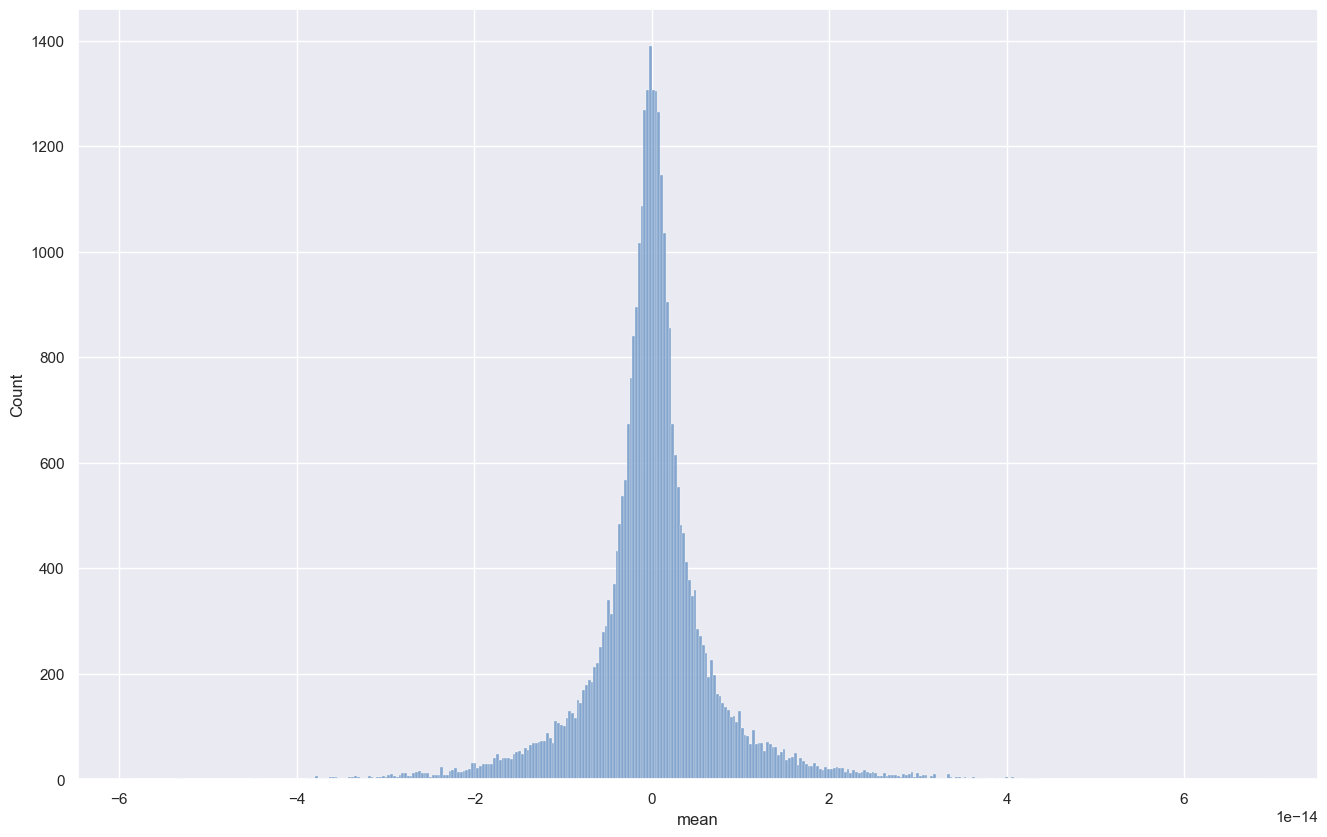

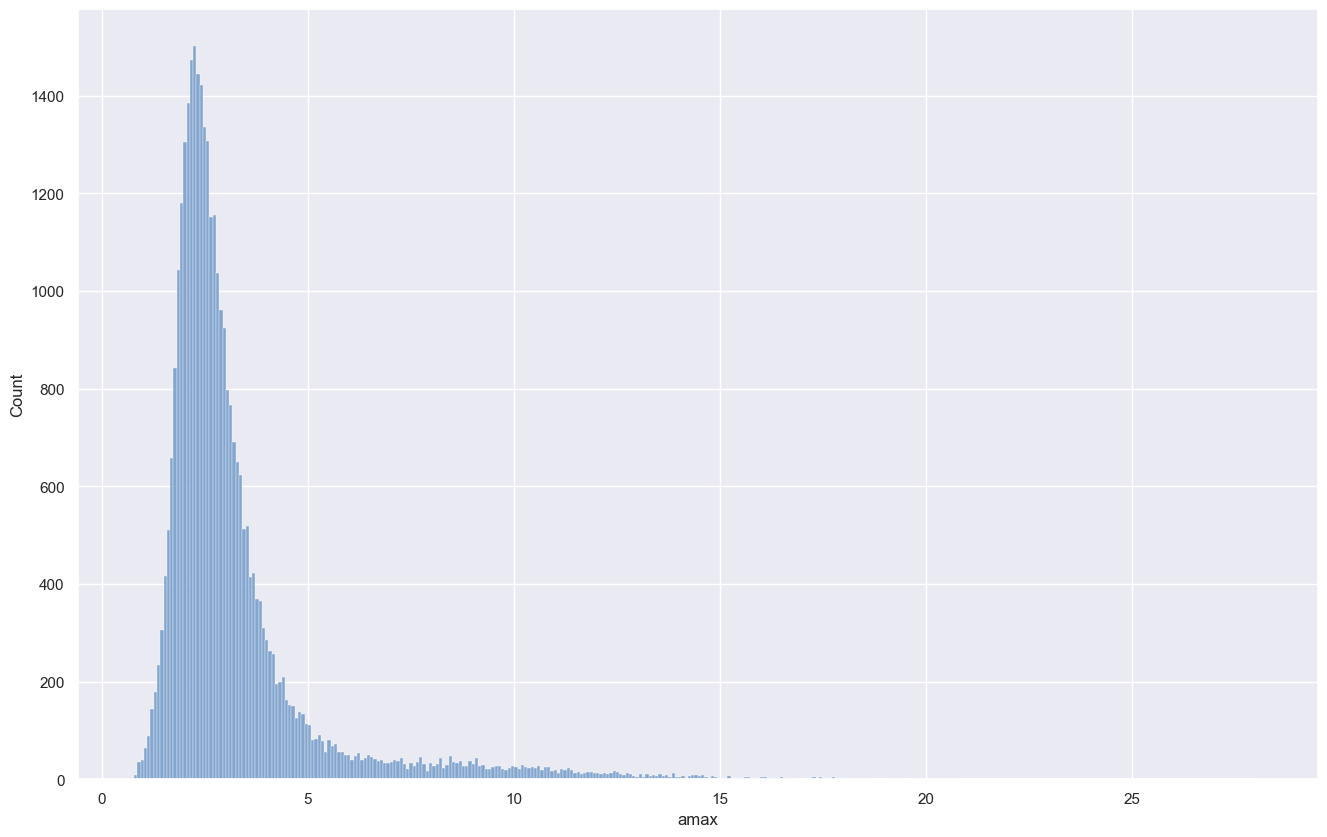

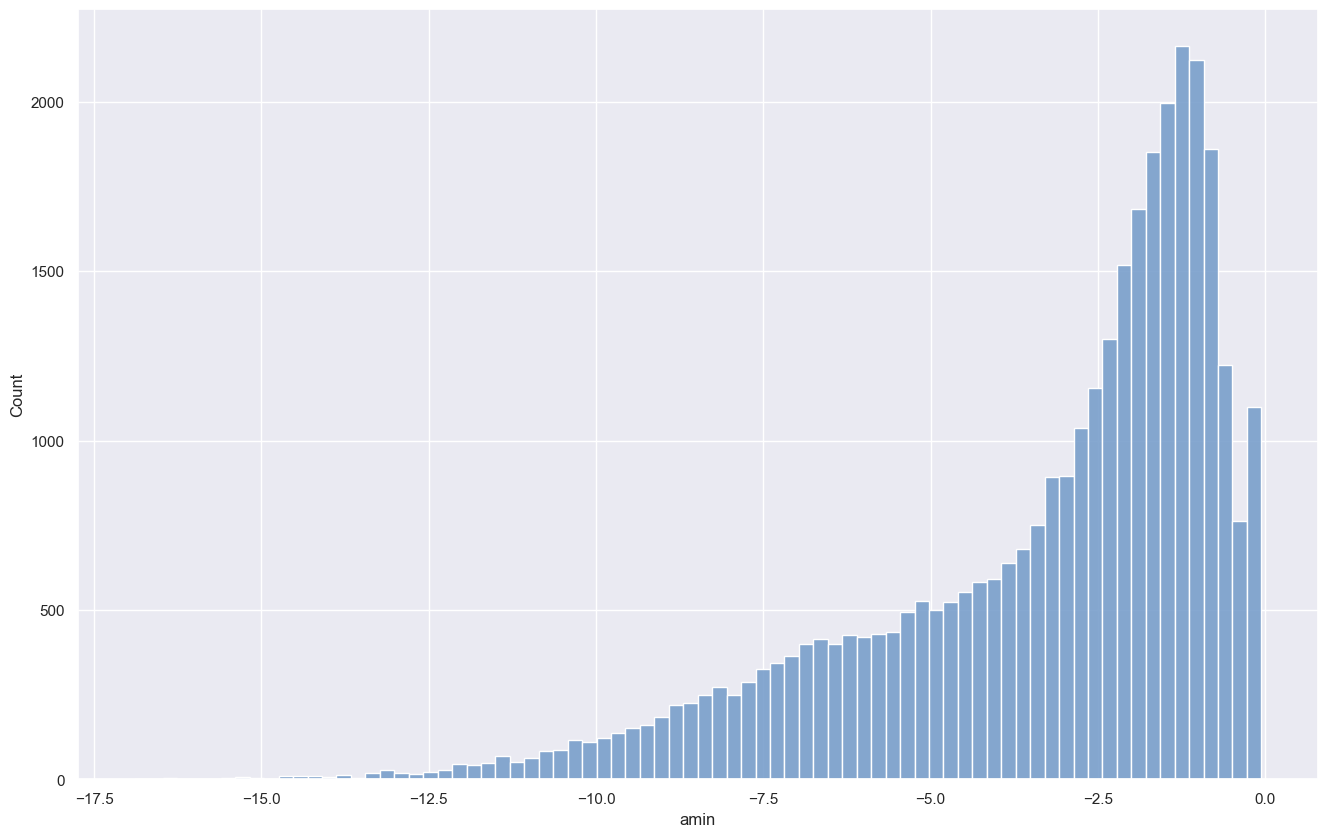

In [18]:
# Display standardized tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'standard',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-standard-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'standard',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-standard-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'standard',
	function = numpy.min,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-standard-min')
)

# 6. Normal

In [19]:
# Compute and save the normalized tpm values

anndata = data_anndata.compute_normalized(
	data       = anndata,
	layer      = 'boxcox1p',
	store_into = 'normal',
	axis       = None
)

In [20]:
# Display normalized log1p tpm matrix information

data_anndata.show_matrix(anndata, layer = 'normal')

   Max value :   1.00000
  Mean value :   0.27977 ± 0.19004
Median value :   0.29336
   Min value :   0.00000

Total elements        : 142,831,346
Total elements =  0.0 :  18,077,905 [ 12.66 %]
Total elements >  0.0 : 124,753,441 [ 87.34 %]
Total elements >  0.1 : 109,071,031 [ 76.36 %]
Total elements >  0.3 :  69,861,113 [ 48.91 %]
Total elements >  0.5 :  18,716,048 [ 13.10 %]
Total elements >  0.7 :     674,389 [  0.47 %]

[[  0.45   0.24   0.41   0.00   0.14   0.15   0.37   0.00   0.59   0.30]
 [  0.46   0.00   0.38   0.29   0.19   0.21   0.38   0.17   0.60   0.20]
 [  0.49   0.11   0.40   0.00   0.10   0.13   0.41   0.17   0.60   0.41]
 [  0.48   0.20   0.41   0.28   0.00   0.13   0.39   0.06   0.61   0.37]
 [  0.49   0.24   0.39   0.12   0.15   0.20   0.32   0.36   0.61   0.00]]


Function : numpy.mean
Genes below 10th percentile [   0.075300] :  3,452
Genes below 30th percentile [   0.174988] : 10,355
Genes above 70th percentile [   0.377543] : 10,355
Genes above 90th percentile [   0.489774] :  3,452

Function : numpy.amax
Genes below 10th percentile [   0.438425] :  3,452
Genes below 30th percentile [   0.515948] : 10,355
Genes above 70th percentile [   0.627505] : 10,355
Genes above 90th percentile [   0.714273] :  3,452

Function : numpy.std
Genes below 10th percentile [   0.056413] :  3,452
Genes below 30th percentile [   0.074911] : 10,355
Genes above 70th percentile [   0.113895] : 10,355
Genes above 90th percentile [   0.153469] :  3,452



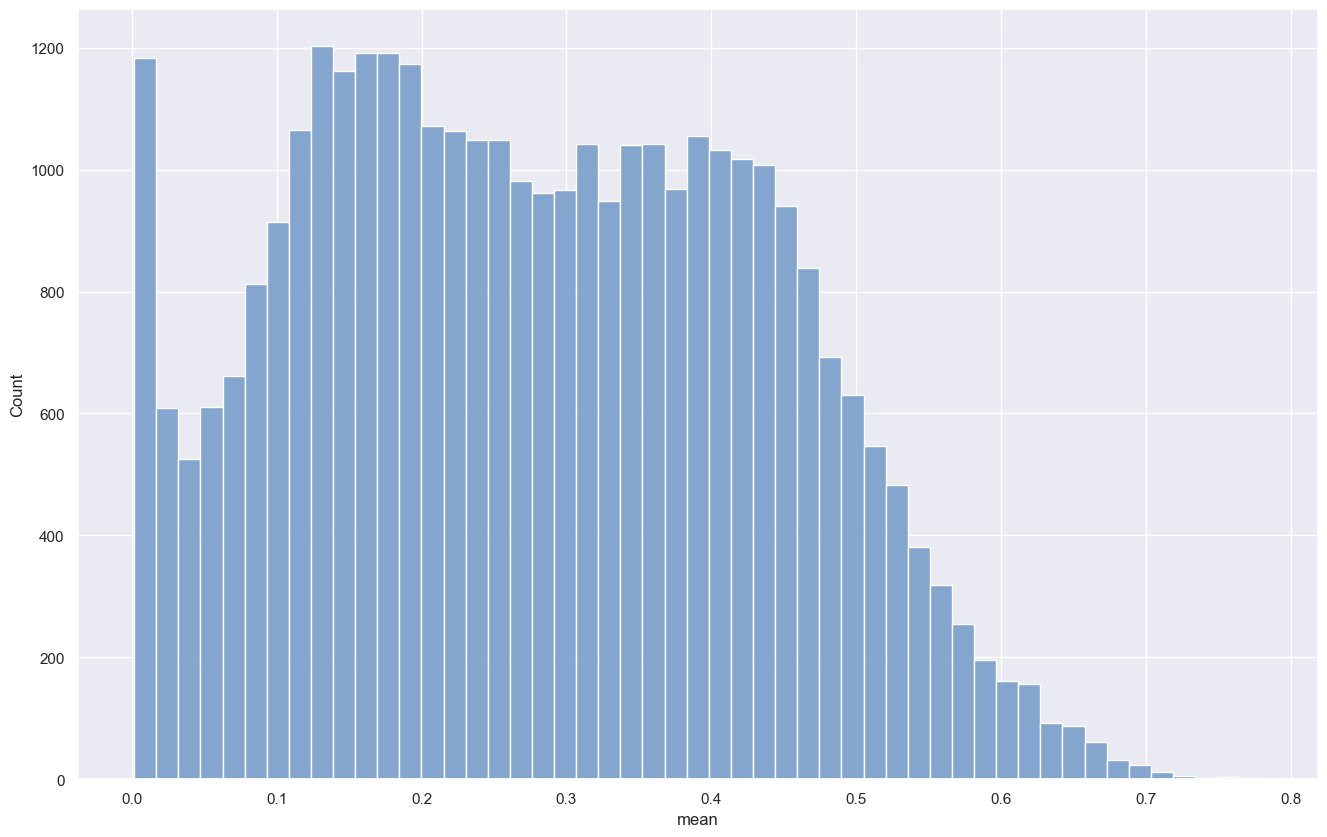

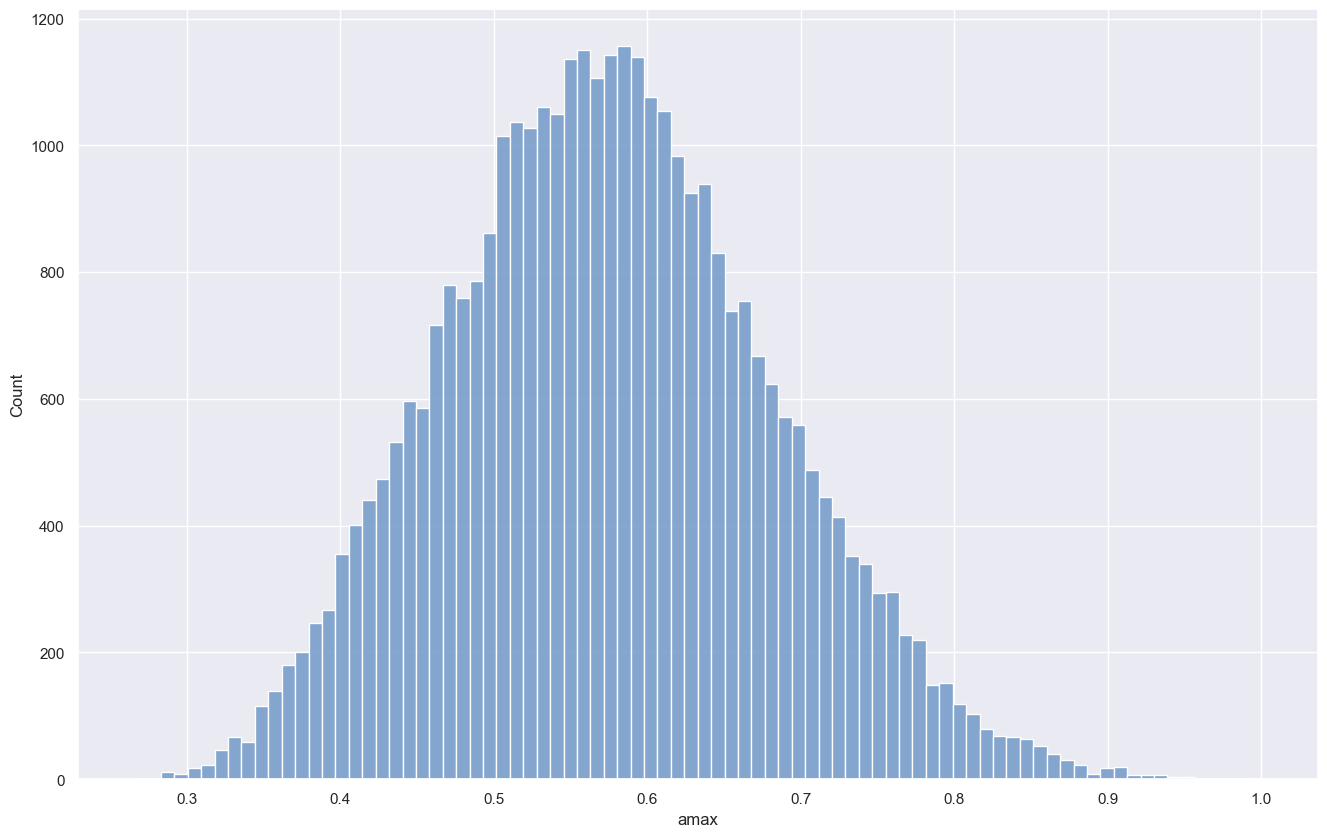

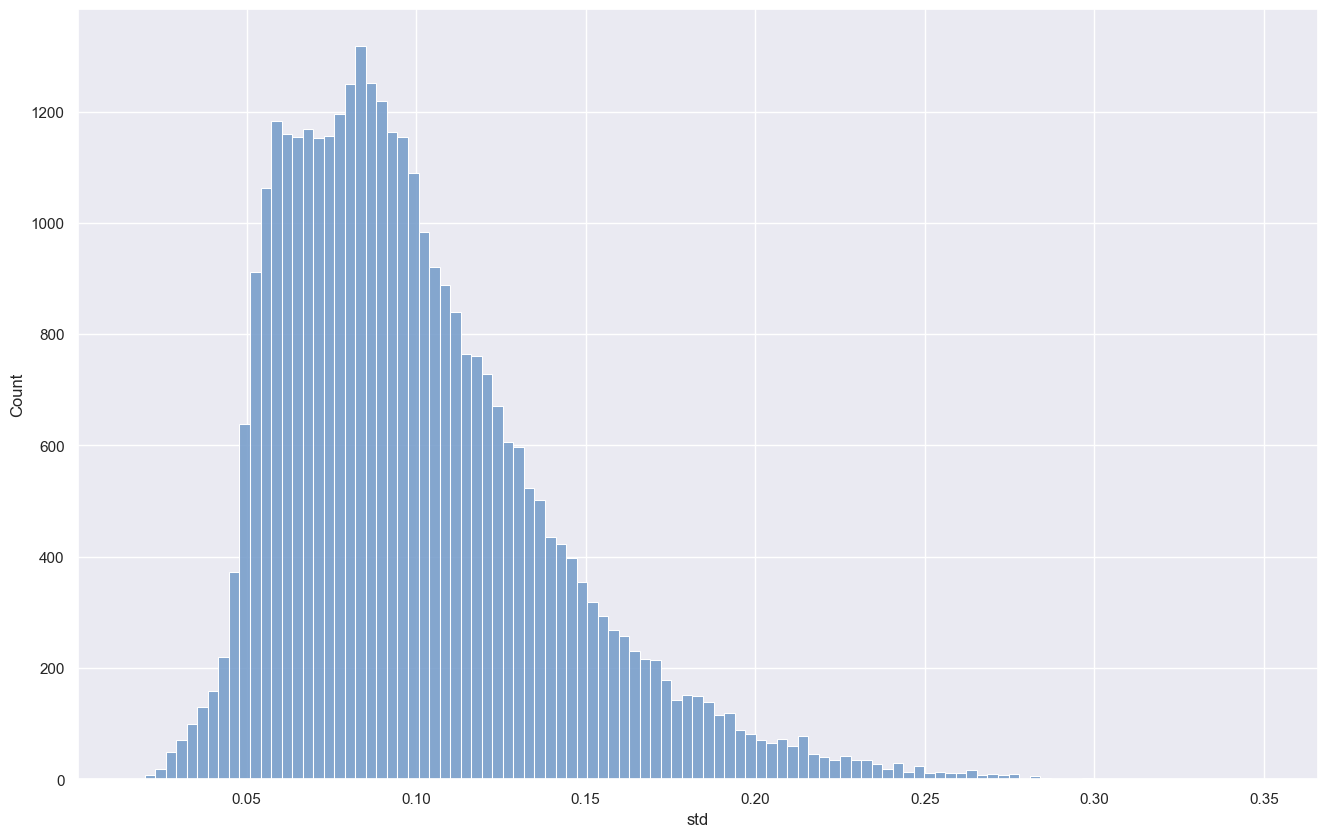

In [21]:
# Display normalized tpm value distribution per gene

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'normal',
	function = numpy.mean,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-normal-mean')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'normal',
	function = numpy.max,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-normal-max')
)

data_anndata.tpm_histplot(
	data     = anndata,
	layer    = 'normal',
	function = numpy.std,
	filters  = None,
	filename = os.path.join(OUT_PLOT, 'distribution-normal-std')
)

# 7. Save

In [22]:
# Save the annotated data with multiple layers

data_writer.write_h5ad(
	data     = anndata,
	filename = os.path.join(OUT_DATA, 'arabidopsis-r36.h5ad')
)